# Lab 1: Introduction to Python 

## Exercise 1: Defining Variables (8 pts)  
1.) Create 4 scalar variables `a,b,c,d` containing the values 1,2,3,4 respectively.  

In [1]:
a = 1
b = 2 
c = 3 
d = 4

2.) Define a 3-component vector `H` containing `a,b,c`.  

In [2]:
import numpy as np 

H = np.array([a,b,c])

3.) Define a 3-component vertical vector `V` containing `b,c,d`. 

_Note_: "Vertical vector" means the array should be of shape (3,1). 

In [3]:
V = np.array([b,c,d]).reshape(-1,1)

4.) Define a 2x2 matric `M` containing a,b,c,d as:  
$$ M = \begin{pmatrix} a & b \\ c & d \end{pmatrix} $$  


In [4]:
M = np.array([[a,b],[c,d]])

5.) Displace the values of:  
  a. The third element of `H`  
  b. The first element of `V`  
  c. The first row of `M`  
  d. The second column of `M`  
  
 _Reminder_: `python` is zero index. We start counting from 0.

In [5]:
print('a. The third element of H:', H[2])
print('b. The first element of V:', V[0])
print('c. The third element of H:', M[0,:])
print('d. The third element of H:', M[:,1])

a. The third element of H: 3
b. The first element of V: [2]
c. The third element of H: [1 2]
d. The third element of H: [2 4]


# Exercise  2: Functions (7 points) 

Write a function that calculates the distance between two vectors in the form $R(\vec x, \vec y)$. Where $R$ is a function that takes two vectors (i.e. $\vec x$,$\vec y$) as input a returns a scalar value of distance. Use your function to calculate the distance between the follow vector pairs:  
  1. `x = [3, 5]`, `y = [3, 4]`  
  2. `x = [2, 0]`, `y = [0, 2]`  
  3. `x = [-100, 30]`, `y = [-10, -50]` 
  
Hint: [mathematical formula to use](http://mathonline.wikidot.com/the-distance-between-two-vectors).

In [6]:
def R(x,y):
    '''Returns the distance between two vectors of length 2. 

            Parameters:
                    x (array): A vector of length 2
                    y (array): Another vector of length 2

            Returns:
                    distance (float): The distance between the two input vectors
    '''
    ### BEGIN SOLUTION
    return np.sqrt(sum((x - y)**2))
    ### END SOLUTION

In [7]:
# Q2.1 Autograde test (DO NOT EDIT)
assert R(np.array([3,5]),np.array([3,4])) == 1.0

In [8]:
# Q2.2 Autograde test (DO NOT EDIT)
assert np.round(R(np.array([2,0]),np.array([0,2])),4) == 2.8284

In [9]:
# Q2.3 Autograde test (DO NOT EDIT)
assert np.round(R(np.array([-100,30]),np.array([-10,-50])),4) == 120.4159

#### Bonus : (3 points)  
Can you "vectorize" (i.e. use element-wise vector operations to simplify) this function? 

## Exercise 3: Loading Data and Plotting (10 pts)  

a. Load the `well_data.txt` data using `numpy`'s `loadtxt` function. The data is formatted such that the columns are:  

  Depth (ft), Electrical Conductivity (mS/m), Temperature (C)   
 

In [10]:
#1 load data

data_mat = np.loadtxt('well_data.txt')

depth_ft = data_mat[:,0]
conduct  = data_mat[:,1]
temp_C   = data_mat[:,1]

 b. Convert depth to meters.

In [11]:
# 2. Convert depth to meters
depth_m  = depth_ft * 0.3048

c. Plot this data on two separate subplots, where the y-axis is Depth (m) and the x-axes are conductivity and temperature. Make sure your figure has:  
  1. Title          (2 points; one for each subplot)  
  2. Axis labels w/ units     (2 points; one for each subplot)  
  3. Readable text  (2 points; one for each subplot)  
  
To create a nice two panel subplots use:  

```python
# import the plotting package 
import matplotlib.pyplot as plt

# create a fig object, and an axes array that share an Y-axis
fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)

# PLOT THE DATA HERE

# Invert y-axis to make the plot with depth from surface 
ax[1].invert_yaxis()
```

where: 
- ```ax``` will be a `np` array where `ax[0]` is the left subplot and `ax[1]` is the right subplot. 
- `ax[1].invert_yaxis()` will flip the y-axis to make the plots with depth from the surface. Note you can only call this once (i.e. on the last axes) or else inverting twice negates itself. 

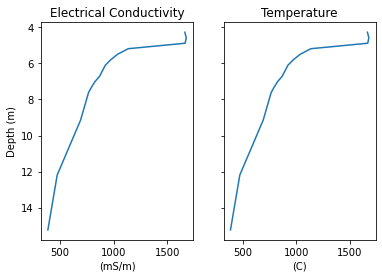

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1,ncols=2,sharey=True)

ax[0].plot(conduct,depth_m)
ax[0].set_title('Electrical Conductivity')
ax[0].set_xlabel('(mS/m)')

ax[0].set_ylabel('Depth (m)')


ax[1].plot(temp_C,depth_m)
ax[1].set_title('Temperature')
ax[1].set_xlabel('(C)')

ax[1].invert_yaxis()

## Exercise 4: Loading Data and Plotting (35 pts)  

Load the data file `ammonoids.mat`, which contains the variables `NumAm` and `MasAm`. The values within `NumAm` represent the number of ammonoid shells found in each grid cell, while `MasAm` gives the average weight of the shells found in each grid cell. `NumAm` and `MasAm` are both $m \times n$ matrices of the same dimension (representing the grid in which the shells were originally found). In this case, we will define that there are $m$ cells in the $x$ direction with a spacing ($\Delta x$) of 10m, and $n$ cells in the $y$ direction with a spacing ($\Delta y$) of 10m (see figure).


In [13]:
import numpy as np 
import scipy.io as sio

data  = sio.loadmat('ammonoids.mat')
NumAm = data['NumAm'].astype(np.float32)
MasAm = data['MasAm'].astype(np.float32)

Provide a brief (one or two sentence) about how I am loading in the data. For example what type of data structure is the variable `data`? What is the point of the `.astype()` call?

a. Write an `if` statement that checks if the sizes of `MasAm` and `NumAm` are equal. If they are, set $m$ to the number of cells in the $x$-direction and $n$ to the number of cells in the $y$-direction. Hint: use `.shape` attribute of NumPy arrays to determine the arrays size. (4 pts)

In [14]:
assert NumAm.shape == MasAm.shape

m,n = NumAm.shape

b. Create a new matrix `TMA` whose elements represent the total mass of the ammonoids within each grid cell. (1 pt)  

In [15]:
TMA = NumAm * MasAm

c. Find the total and average mass of ammonoids per cell in the first row using two different methods: 1) using indexing and the `.mean()` method of NumPy arrays and 2) with a `for` loop. (8 pts)

In [16]:
# Method One: Indexing 

### BEGIN SOLUTION
np.mean(TMA[0,:])
### END SOLUTION

170.16667

In [17]:
# Method Two: for loop 

### BEGIN SOLUTION
vals = []
for j in range(TMA.shape[1]):
    vals.append(TMA[0,j])

print(sum(vals)/len(vals))
### END SOLUTION

170.16666666666666


d. Make a new variable called `TMA300` that is the same size as `TMA` using the `np.zeros(m,n)` function. If the total mass of the ammonoids in a cell is greater than 300, place the total mass (value in `TMA`) in your new variable at the same cell location. 

__Suggestion__:   
  - _Those programing for the first time_: We will need two nested for loops to iterate over the rows then columns. 
  - _Those with programing experience_: Use Boolean Indexing here! See [here](http://www.math.buffalo.edu/~badzioch/MTH337/PT/PT-boolean_numpy_arrays/PT-boolean_numpy_arrays.html) for a quick introduction. 

In [18]:
TMA300 = TMA.copy()
TMA300[TMA300 < 300.] = np.nan

e. Repeat step (d) making a new variable `TMA100` that only includes mass values less than 100, and new variable `TMA200` that only include mass values greater than 100 and less than 300. (5 pts)

_Hint_: For those attempting boolean indexing, see [here](http://www.math.buffalo.edu/~badzioch/MTH337/PT/PT-boolean_numpy_arrays/PT-boolean_numpy_arrays.html#logical-operations-on-boolean-arrays) for combining logical operations.  Make sure to enclose your conditions in parentheses. Use `|` for `or` and `&` for `and`.  

In [19]:
TMA100 = TMA.copy()
TMA100[TMA100 > 100.] = np.nan

TMA200 = TMA.copy()
TMA200[(100. > TMA200) | (TMA200 > 300.)] = np.nan

f. Calculate the mean mass of the ammonoids greater than 100 and less than 300. Hint: use the function `np.nanmean`. (3 pts)

In [20]:
np.nanmean(TMA200)

186.85

g. Make a spatial plot of `TMA100`, `TMA200`, and `TMA300` using `ax[i].imshow()`. Put all three plots on the same figure using the array of subplot axes `ax`. Furthermore, use the `ax[i].set_title()` method to add a title to each subplot. 

_Note_: To add a colorbar to your figure use: 

```python
cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Ammonoids Mass')
```
after your calls to `.imshow()`, where:
- `fig` is the figure object returned from `plt.subplots`.   
- `im` is the output of `.imshow()`. It's okay to assign it multiple times (or just once).  
- `ax` is the array of subplot axes.  
- `cbar` is colorbar object which has similar methods/attributes as a subplot object.  

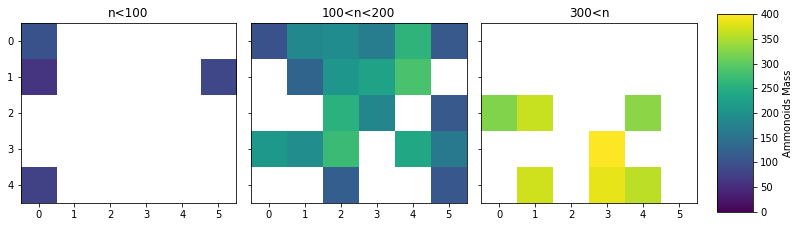

In [21]:
fig, ax = plt.subplots(nrows=1,ncols=3,sharex=True,sharey=True,figsize=(11,3), constrained_layout=True)

### BEGIN SOLUTION
im = ax[0].imshow(TMA100,clim=(0,400))
im = ax[1].imshow(TMA200,clim=(0,400))
im = ax[2].imshow(TMA300,clim=(0,400))


ax[0].set_title("n<100")
ax[1].set_title("100<n<200")
ax[2].set_title("300<n")

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Ammonoids Mass')
### END SOLUTION
